<a href="https://colab.research.google.com/github/mint-aguccim/Machine_Learning_Programming/blob/main/5%EC%A3%BC%EC%B0%A8/5%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# 1. 데이터 준비
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [3]:
# 훈련 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, random_state=42
)

In [4]:
# 2. 딥러닝을 위한 데이터 전처리
# 🧠 2-1) 데이터 정규화 (0~1 사이 값으로 스케일링)
# 각 픽셀은 0~16의 값을 가집니다. 16으로 나누어 0~1 범위로 만듭니다.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# 🧠 2-2) 레이블 원-핫 인코딩 (One-Hot Encoding)
# 예: 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
# 분류 문제에서 각 클래스에 대한 확률을 출력하기 위해 필요합니다.
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

In [6]:
# 3. 딥러닝 모델 구축
model = Sequential([
    Dense(128, activation='relu', input_shape=(64,)),  # 입력층 + 첫 번째 은닉층
    Dense(64, activation='relu'),                     # 두 번째 은닉층
    Dense(10, activation='softmax')                   # 출력층 (10개 숫자 클래스)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# 4. 모델 컴파일
# 옵티마이저, 손실 함수, 평가 지표 설정
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 구조 요약 출력
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,226 (67.29 KB)

 Trainable params: 17,226 (67.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 5. 모델 학습
print("\n--- 모델 학습 시작 ---")
history = model.fit(
    X_train, y_train_one_hot,
    epochs=20,  # 전체 데이터를 20번 반복 학습
    batch_size=32,
    validation_data=(X_test, y_test_one_hot),
    verbose=1 # 학습 과정 출력
)
print("--- 모델 학습 완료 ---\n")


--- 모델 학습 시작 ---
Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3656 - loss: 2.1038 - val_accuracy: 0.7778 - val_loss: 1.3315
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8402 - loss: 1.0595 - val_accuracy: 0.9083 - val_loss: 0.5036
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9275 - loss: 0.4076 - val_accuracy: 0.9306 - val_loss: 0.2797
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9475 - loss: 0.2460 - val_accuracy: 0.9528 - val_loss: 0.2032
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9642 - loss: 0.1860 - val_accuracy: 0.9556 - val_loss: 0.1761
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9670 - loss: 0.1501 - val_accuracy: 0.9639 - val_loss: 0.1467
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9781 - loss: 0.1210 - val_accuracy: 0.9750 - val_loss: 0.1292
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9794 - loss: 0.1131 - val_accuracy: 

In [9]:
# 6. 모델 평가
loss, accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)
print(f"딥러닝 모델 정확도: {accuracy:.4f}")

딥러닝 모델 정확도: 0.9722


In [10]:
# 7. 샘플 데이터 예측
print("\n--- 샘플 데이터 예측 ---")
sample_index = 15
sample_image = X_test[sample_index]
actual_label = y_test[sample_index]


--- 샘플 데이터 예측 ---


In [11]:
# 딥러닝 모델은 각 클래스에 대한 확률을 반환
pred_probabilities = model.predict(sample_image.reshape(1, -1))
# 가장 높은 확률을 가진 클래스의 인덱스를 예측 값으로 선택
predicted_label = np.argmax(pred_probabilities)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


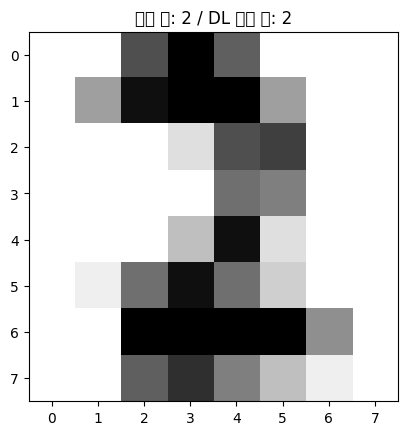

In [12]:
# 예측 결과 시각화
plt.imshow(sample_image.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"실제 값: {actual_label} / DL 예측 값: {predicted_label}")
plt.show()